C:\Users\Manasi\AppData\Local\Temp\ipykernel_12208\364857068.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


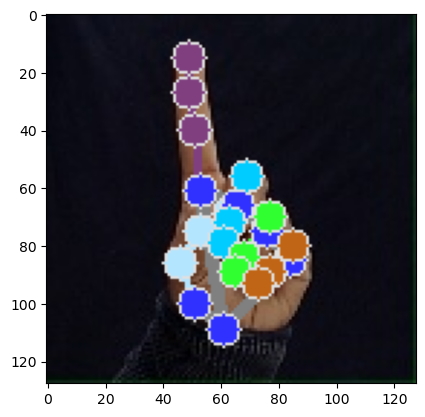

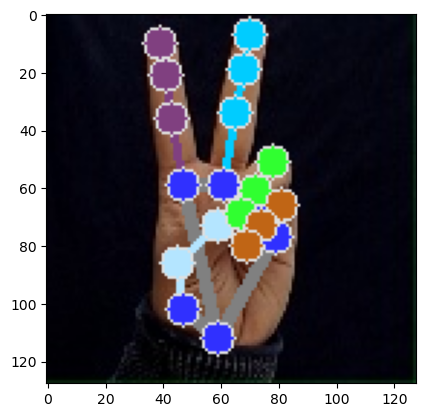

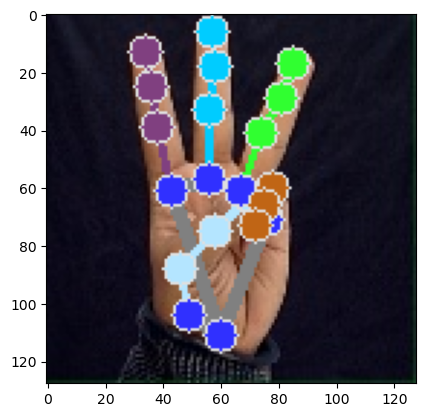

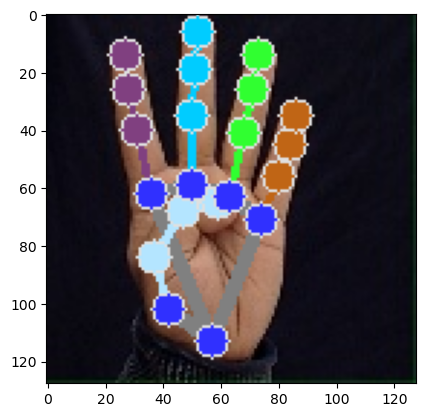

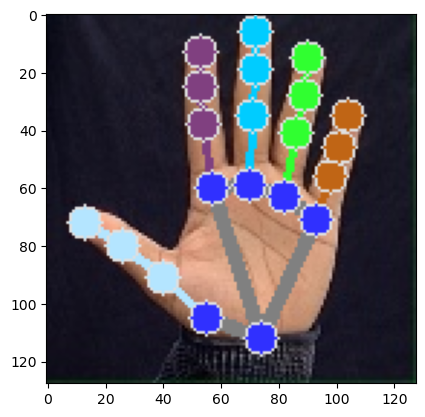

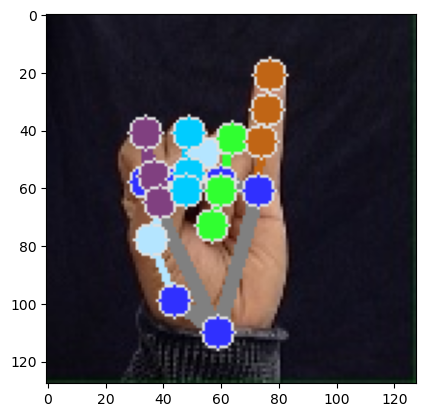

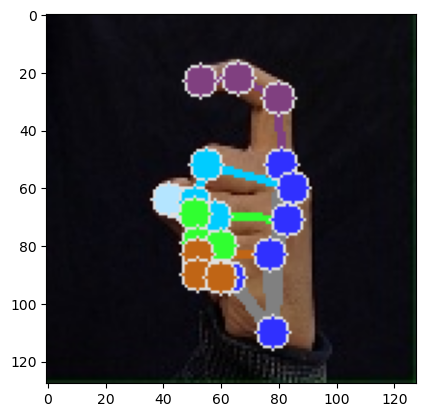

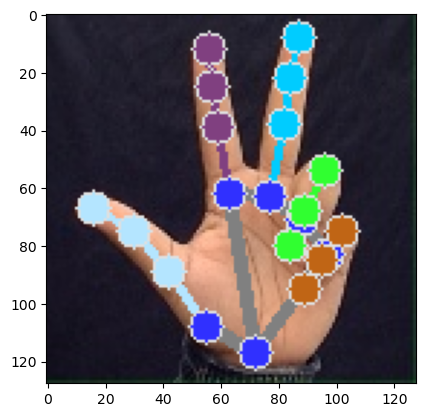

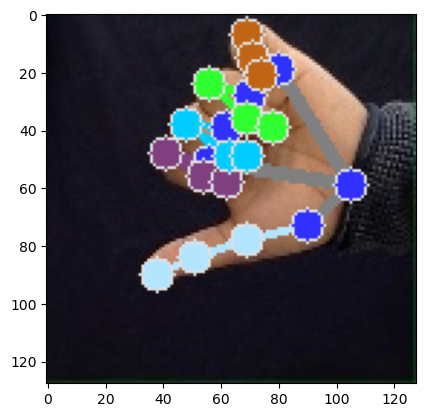

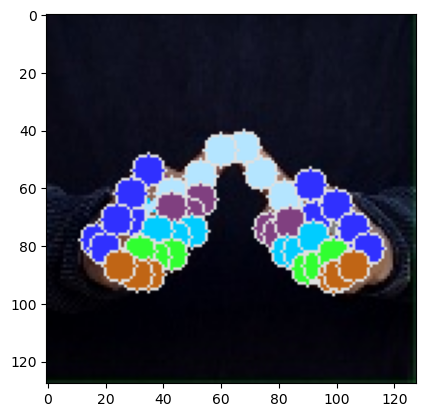

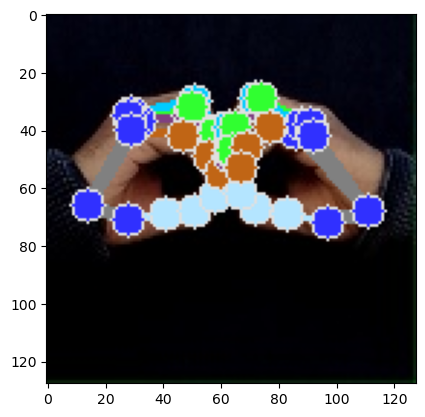

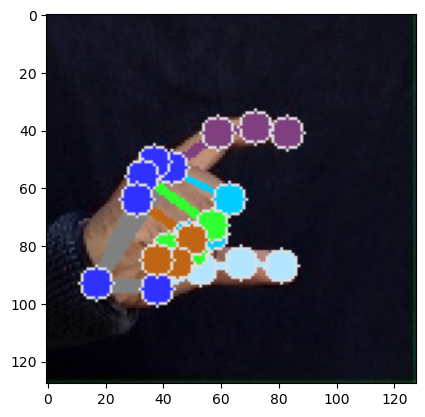

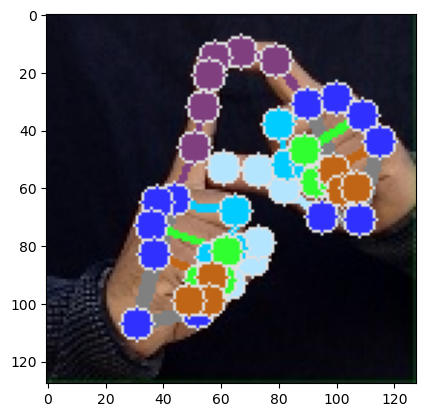

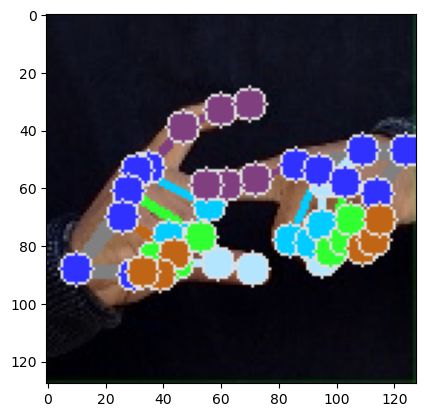

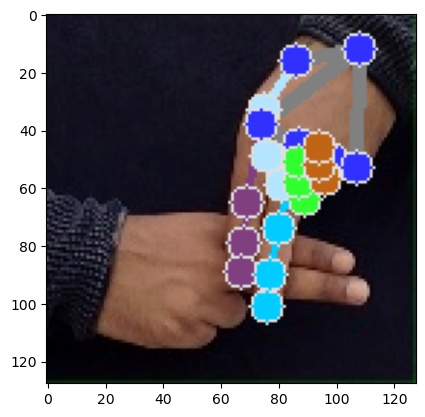

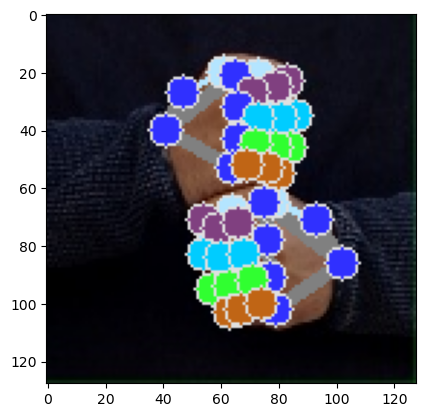

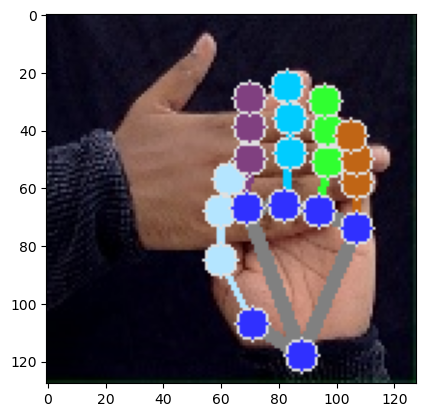

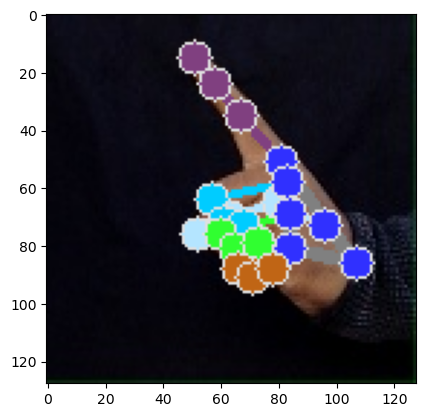

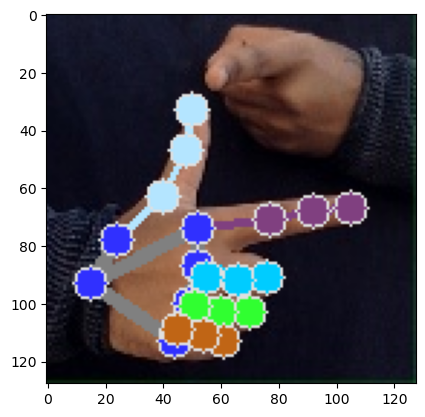

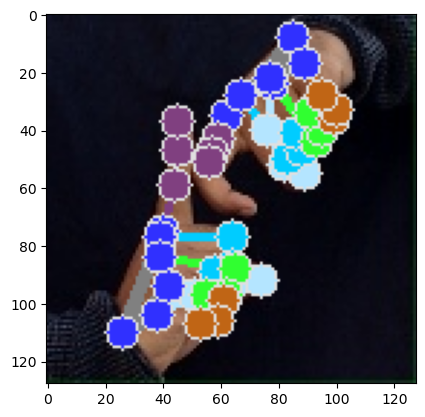

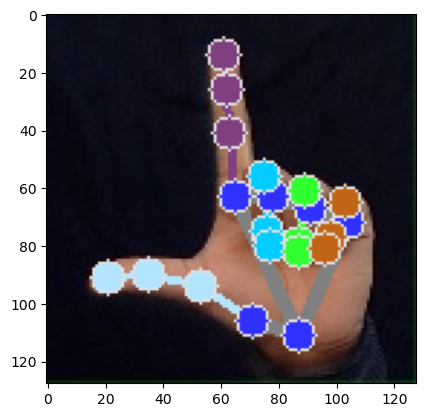

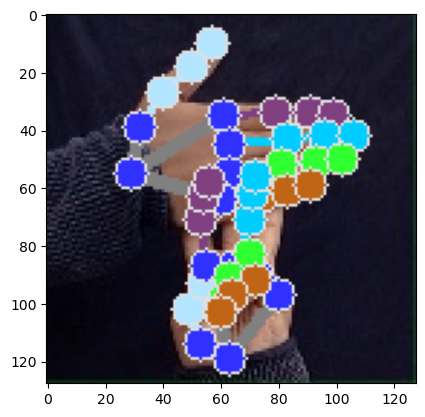

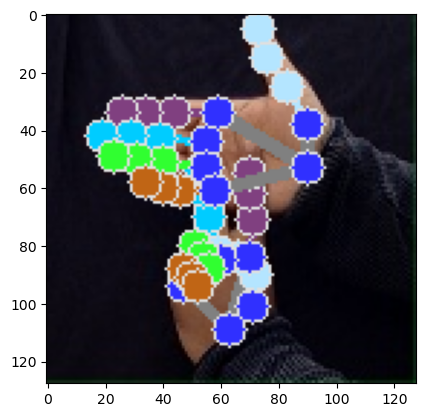

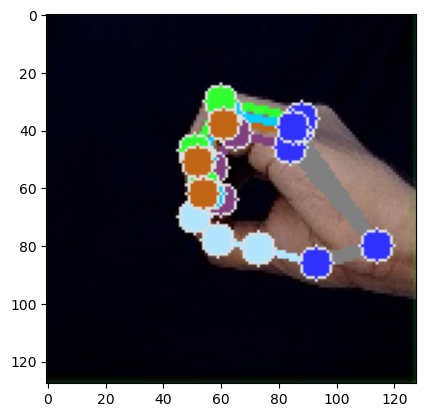

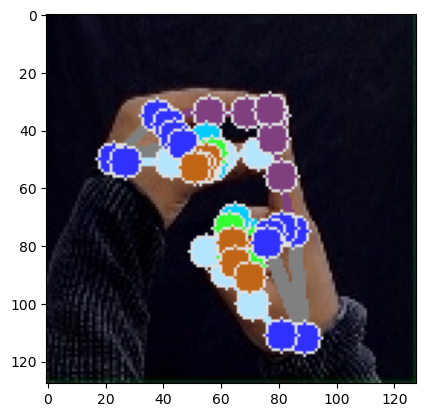

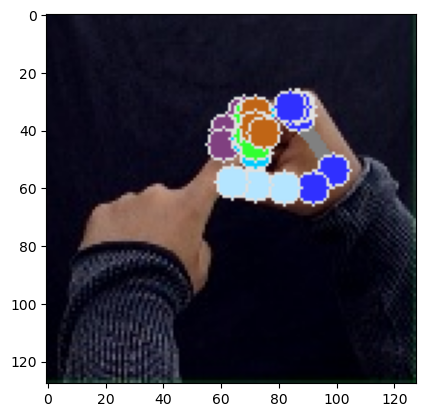

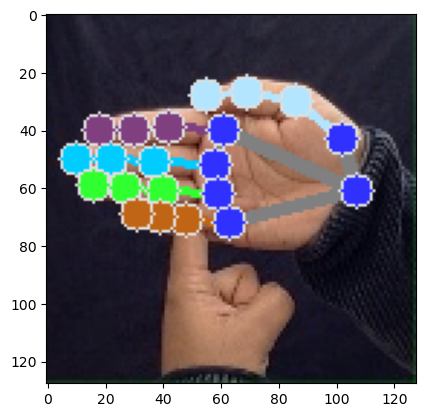

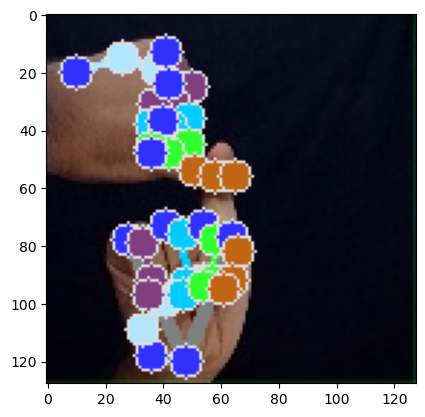

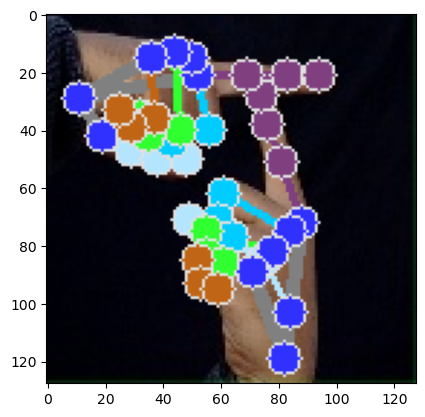

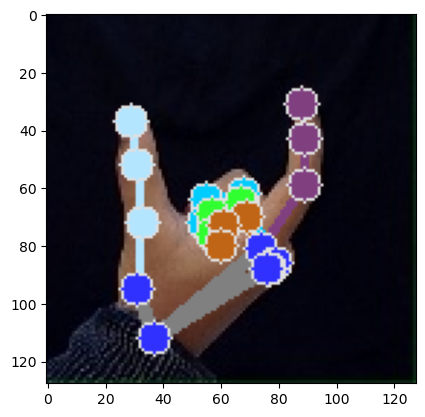

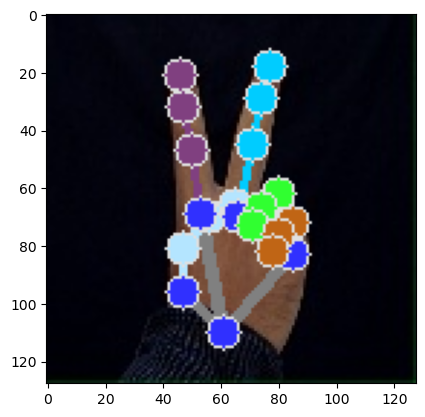

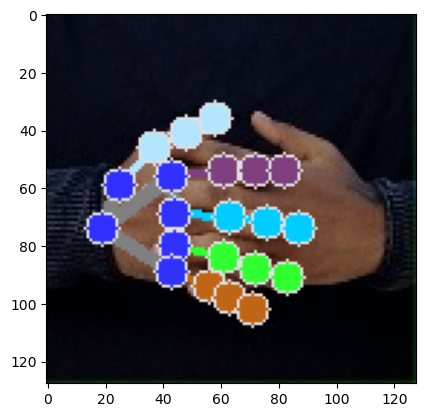

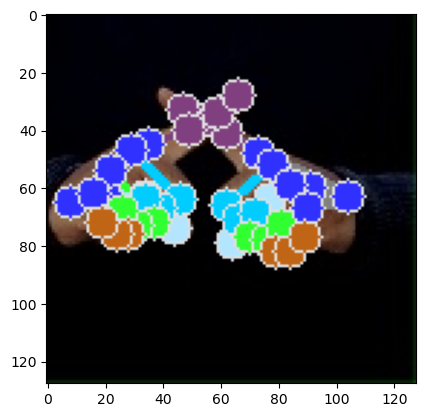

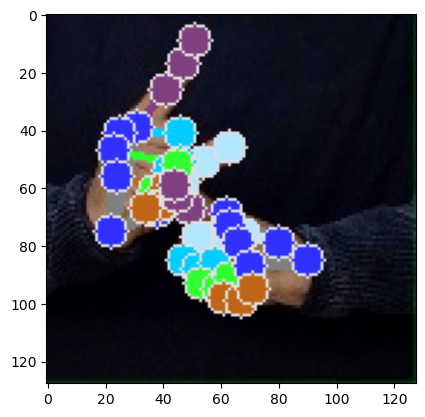

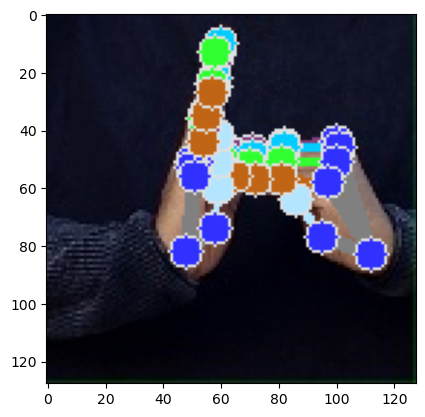

In [3]:
import os

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp. solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
data_dir = './indian_data'

for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_))[:1]:
        img = cv2.imread(os.path.join(data_dir,dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
            
        plt.figure()
        plt.imshow(img_rgb)

plt.show()

In [5]:
!pip cache purge


Files removed: 61


In [8]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp. solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
data_dir = './indian_data'

data = []
labels = []
for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_)):
        data_aux = []
        img = cv2.imread(os.path.join(data_dir,dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()            